In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import os
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis.

Objective

The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

In [2]:
data = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [3]:
data.shape

(1525, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [5]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
data['age'].describe()

count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

## Univariate Analysis

In [7]:
data.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [8]:
data['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

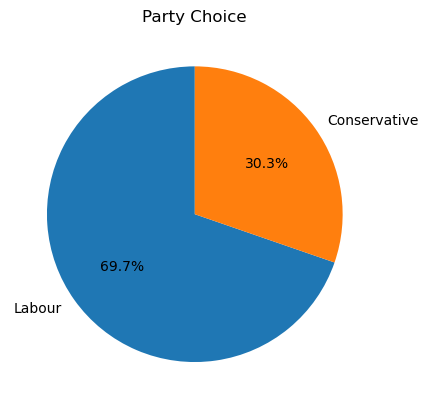

In [9]:
category_counts = data['vote'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Party Choice")
plt.show()

The above pie chart indicates the percentage of voters preferrinf their party of choice. Voters highest preffered is Labour accounting to approximately 70% of the votes and the least being Conservative accounting upto 30% of the total votes. This also being the target variable we can say the target is not highly oversampled yet there is a domination of Labour over Conservative

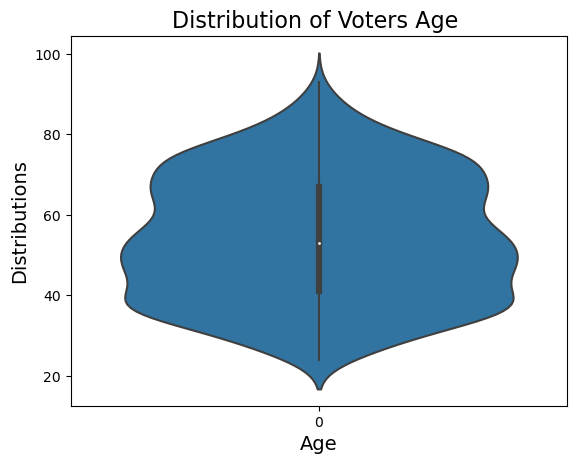

In [10]:
sns.violinplot(data['age'])
plt.title("Distribution of Voters Age ", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Distributions", fontsize=14)
plt.show()

In [11]:
data['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

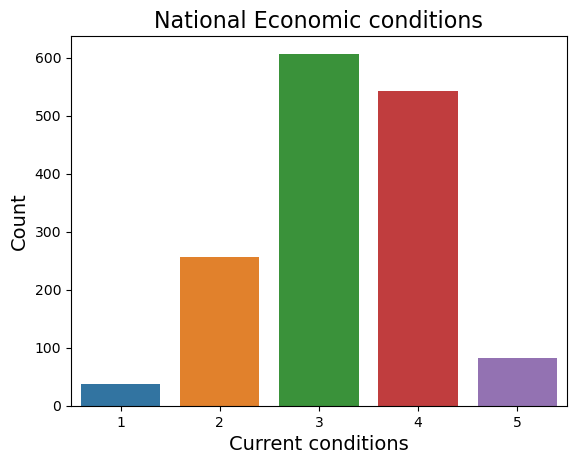

In [12]:
sns.countplot(x='economic.cond.national', data=data)
plt.title("National Economic conditions", fontsize=16)
plt.xlabel("Current conditions", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

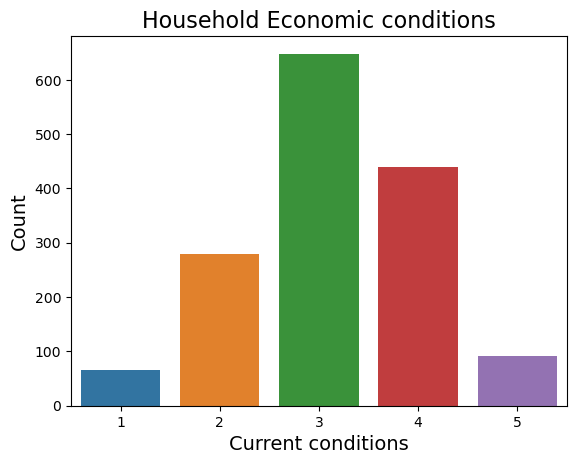

In [13]:
sns.countplot(x='economic.cond.household', data=data)
plt.title("Household Economic conditions", fontsize=16)
plt.xlabel("Current conditions", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

The current economic conditions of the national and the household appears to be almost similar both indicated COndition 3 is the highest amont the voters and 1 being the least. This analysis could also imply that both the variables are displaying same details and dropping one could bring no harm to the model. However, a further analysis needs to be performed to evaluate the same.

In [14]:
data.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

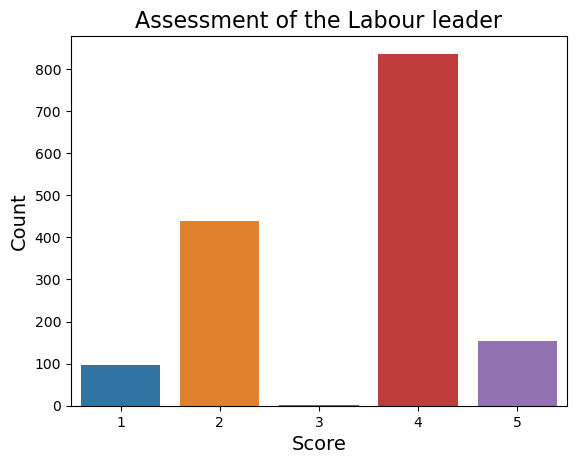

In [15]:
# Assement of the Labour leader
sns.countplot(x='Blair', data=data)
plt.title("Assessment of the Labour leader", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

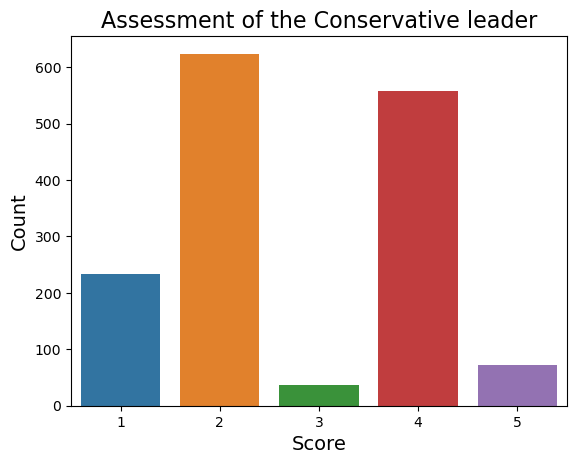

In [16]:
# Assement of the Conservative leader
sns.countplot(x='Hague', data=data)
plt.title("Assessment of the Conservative leader", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

The assesment of the Labour and the Conservative Leader comes out quite interesting since the Labour leader has the highest assessment at point 4 which is the second best after 5 and the conservative leader has the highest assessment at point 2 which is the second worst after 1. The conservative leader also has a score at 4 in the most number of occasions after score at 2.

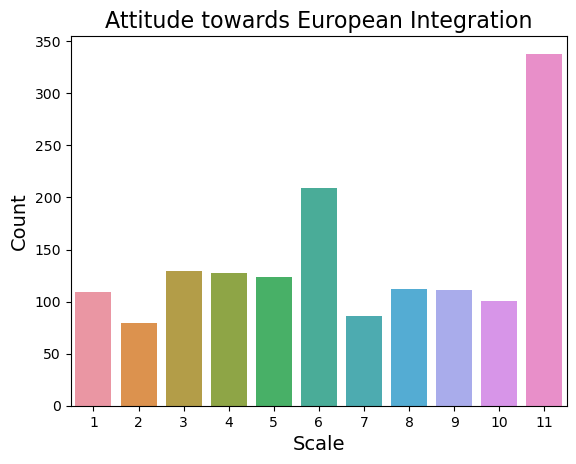

In [17]:
# Assement of the Conservative leader
sns.countplot(x='Europe', data=data)
plt.title("Attitude towards European Integration", fontsize=16)
plt.xlabel("Scale", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Highest number of voters in a scale of 1-11 have shown Eurosceptic sentiment as the the scale of 11 has the maximum count followed by 6. The plot also says majority of the voters have shown Eurosceptic sentiment since the scale above 5 appears to have more counts compared to the scale 1-5.  

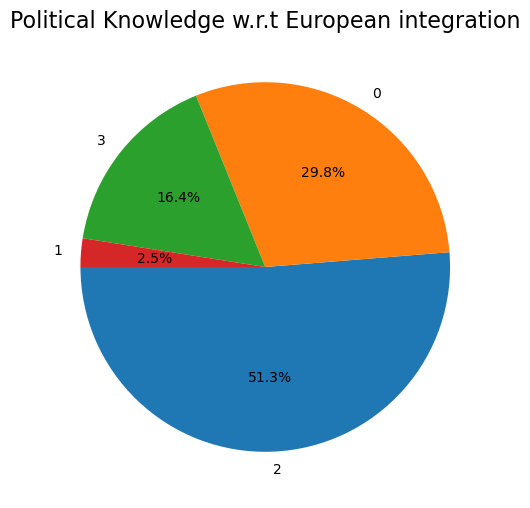

In [18]:
plt.figure(figsize=(12,6))
category_counts = data['political.knowledge'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=180)
plt.title("Political Knowledge w.r.t European integration", fontsize=16)
plt.show()

51.3 % percentage of voters had a knowledge  of parties positions on European integration. Whereas, approximately 30% of the voters did not have a knowledge  of parties positions on European integration. Approximately 16% of the voters had a full knowlwdge of European integration

In [19]:
data['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

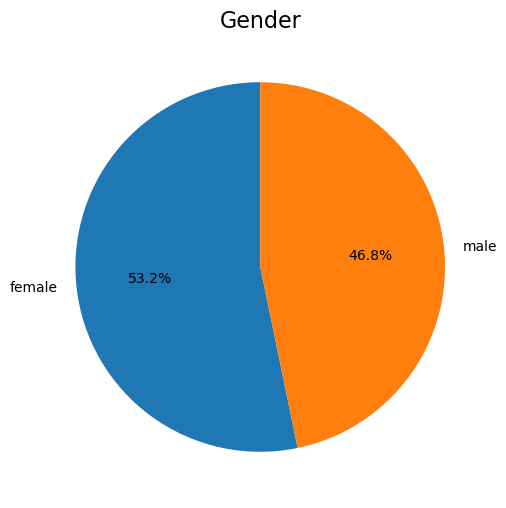

In [20]:
plt.figure(figsize=(12,6))
category_counts = data['gender'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender", fontsize=16)
plt.show()

The sampling of the gender variable is almost same and imbalance between the class is not observed. However, majority of the voters are female owing to 53.2% (812) of the total number of voters in the data provided

## Multivariate Analysis

In [21]:
data.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

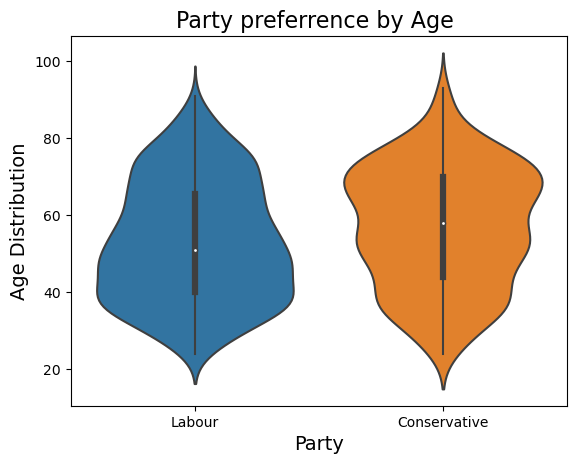

In [22]:
sns.violinplot(data=data, x='vote', y='age')
plt.title("Party preferrence by Age ", fontsize=16)
plt.xlabel("Party", fontsize=14)
plt.ylabel("Age Distribution", fontsize=14)
plt.show()

The median of the Age for the Labour Party voters closes in at approximately 50 whereas the Age for the conservative party voters closes in at 60. The Labour party is slightly skewed towards its right indicating most of it voters are distributed in the lower range (age). The Conservative party is slightly skewed towards its left indicating most of it voters are piled in the upper range (age).

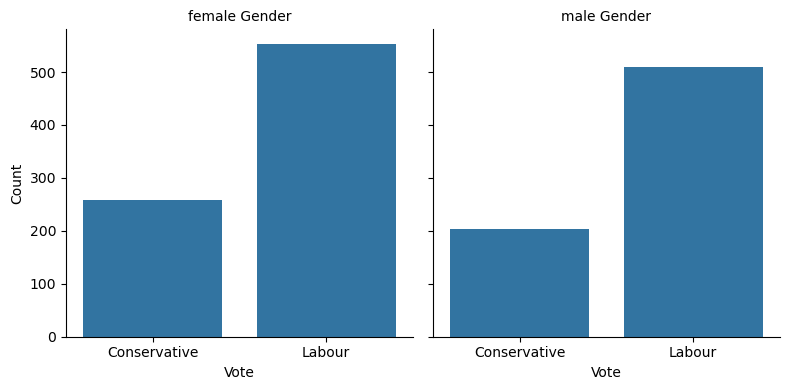

In [23]:
g = sns.FacetGrid(data, col="gender", height=4, aspect=1)
g.map(sns.countplot, "vote", order=["Conservative", "Labour"])

# Set titles and labels
g.set_titles("{col_name} Gender")
g.set_axis_labels("Vote", "Count")

# Show the plot
plt.show()

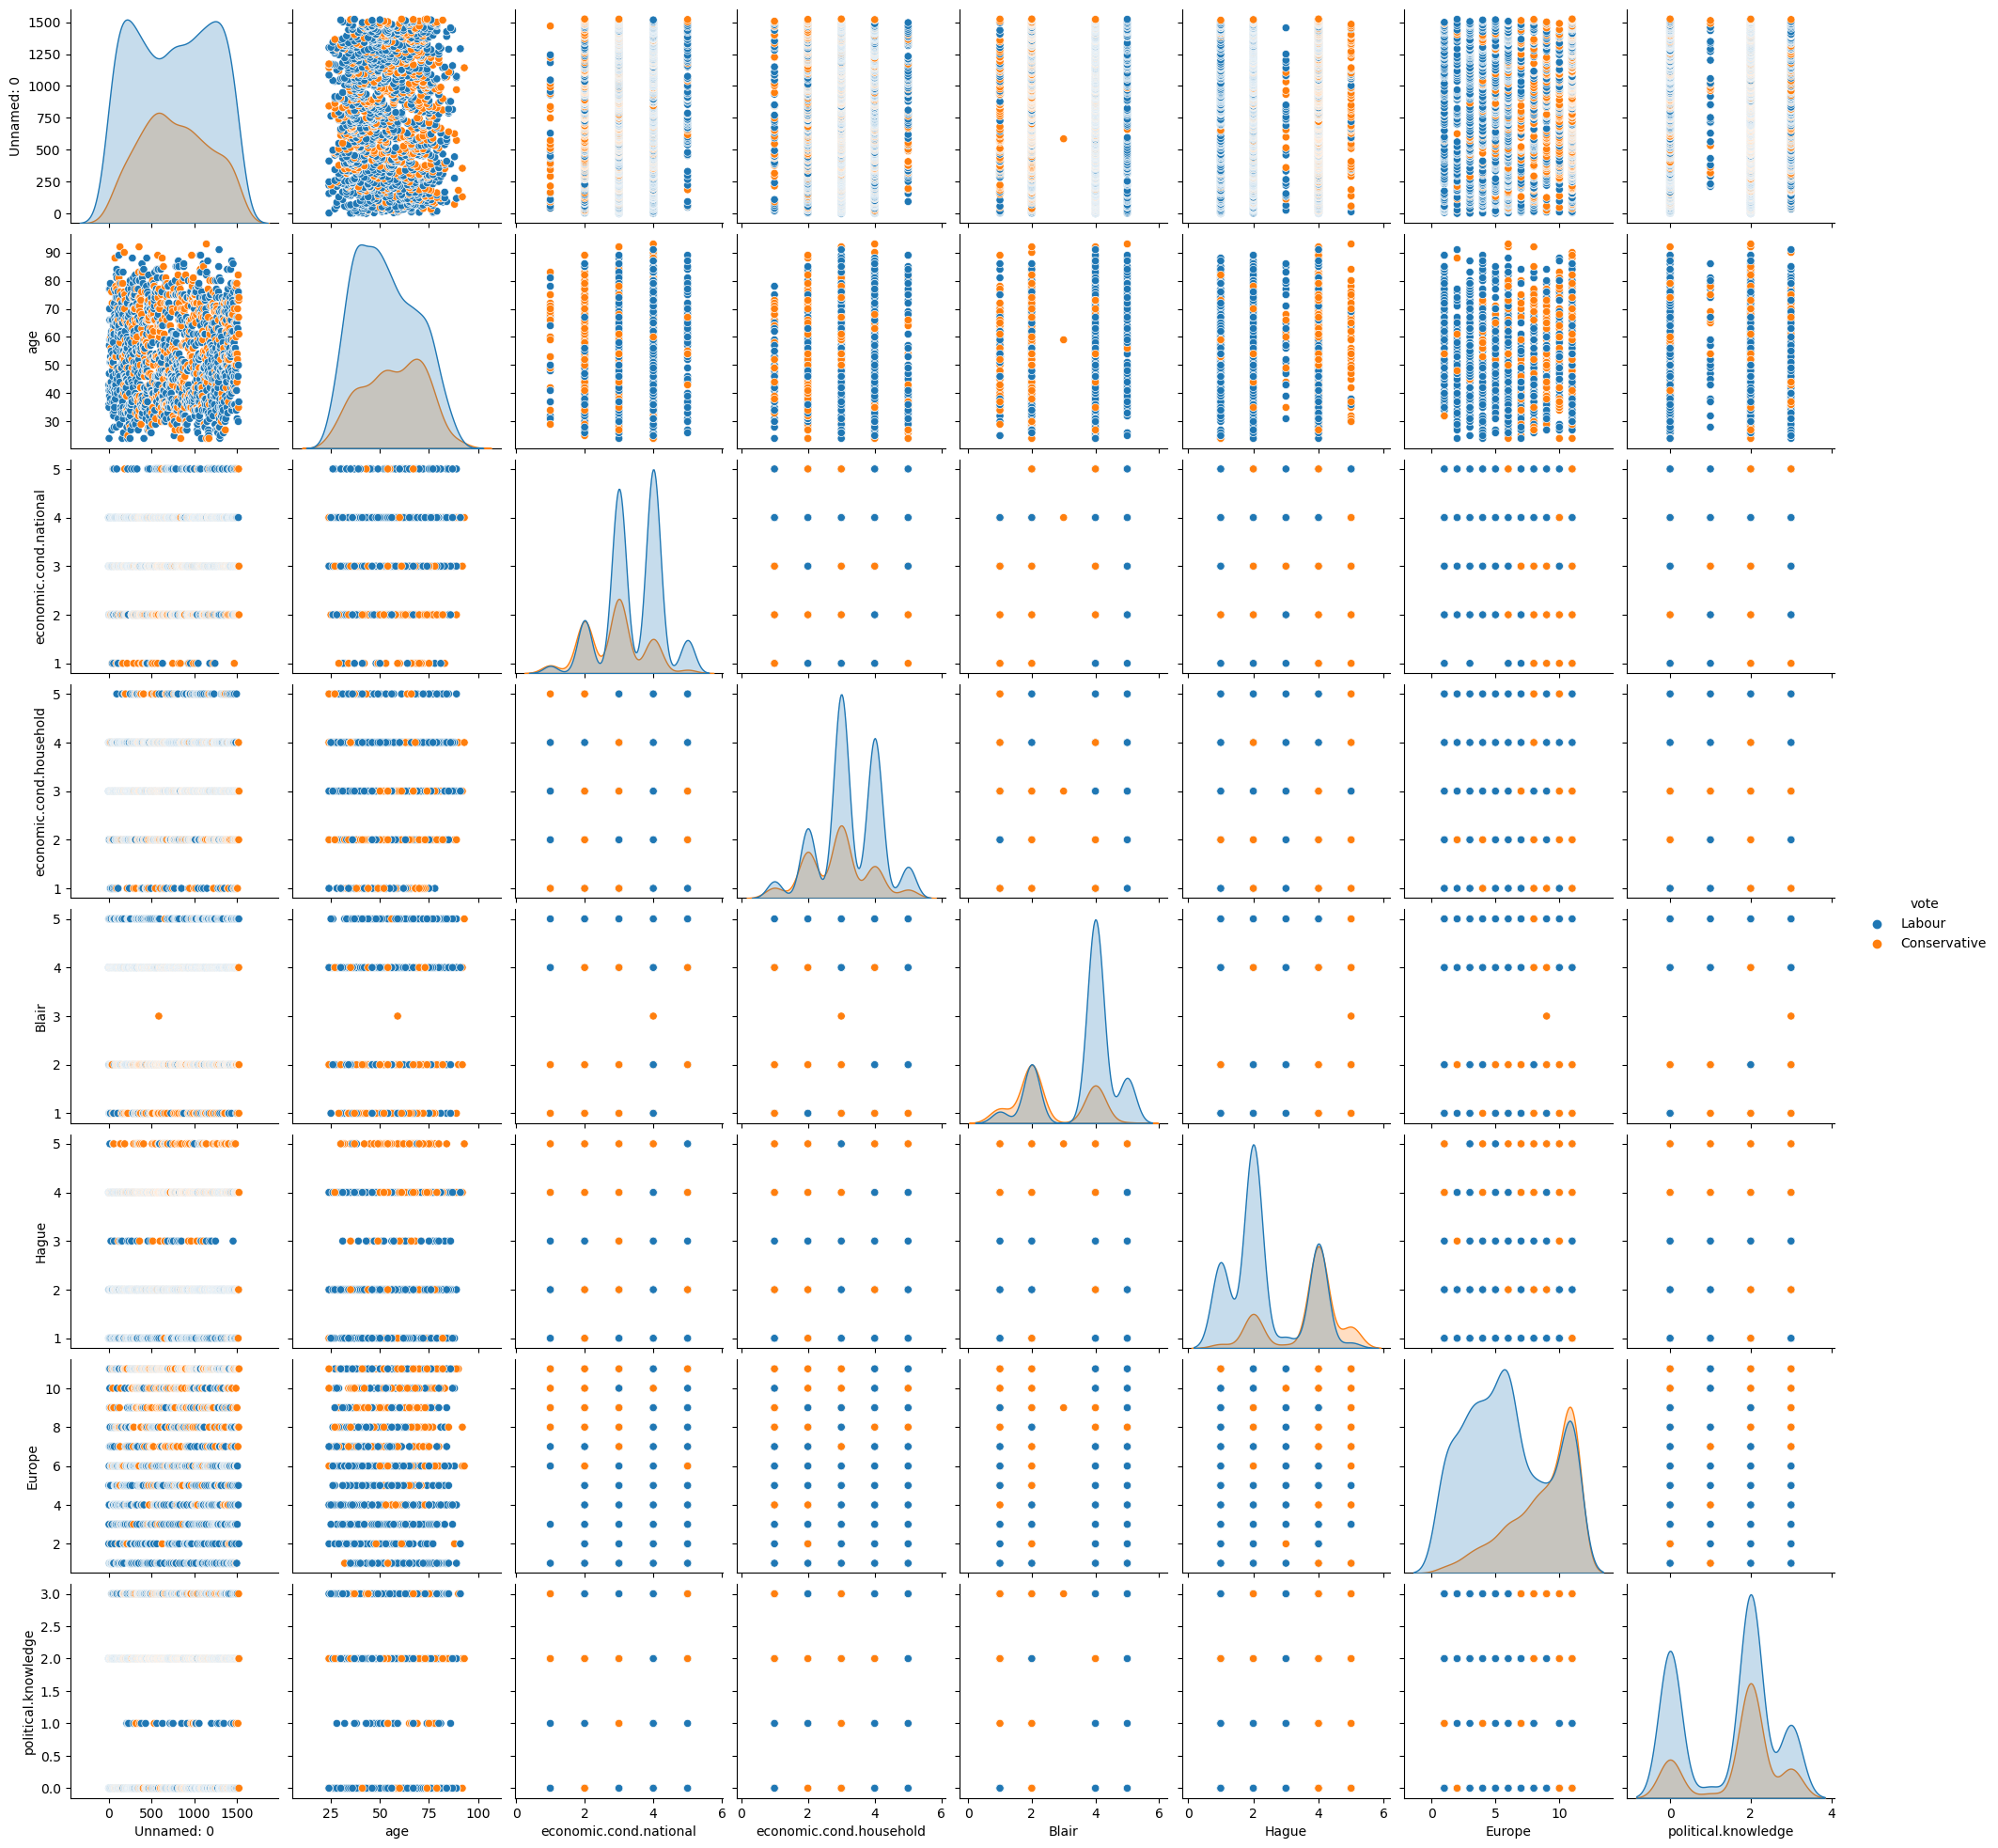

In [24]:
sns.pairplot(data=data, hue='vote', diag_kind = 'kde')

In [25]:
data.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

# Data Preprocessing

Drop the first column which appears to be ID and has been unnamed


In [26]:
df = data.copy()

In [27]:
df.drop('Unnamed: 0', axis=1, inplace=True)

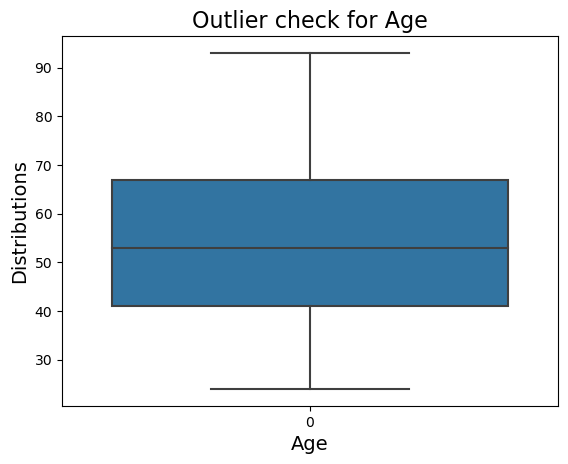

In [28]:
sns.boxplot(df['age'])
plt.title("Outlier check for Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Distributions", fontsize=14)
plt.show()

Outliers are absent for the Age variable and does'nt need any further treatment

### Data Encoding

In [29]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


vote and gender varaibles needs to be encoded  and simple mapping with 0 and 1 for the category is applied since they are binary variable. The other variables being ordinal we will keep the order as it is.

## Labour Party and male gender will be converted to 0

## Conservative and female will be converted to 1

In [30]:
df['vote'] = df['vote'].map({'Labour':0, 'Conservative':1})
df['gender'] = df['gender'].map({'male':0, 'female':1})

In [31]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,1
1,0,36,4,4,4,4,5,2,0
2,0,35,4,4,5,2,3,2,0
3,0,24,4,2,2,1,4,0,1
4,0,41,2,2,1,1,6,2,0


### Data Split

In [32]:
X = df.drop(['vote', 'economic.cond.household'], axis=1)
y = df['vote']

The variable economic condition of household and national came out to be almost similar. Hence, we will consider one of the either. Considering Economic condition national over household provided better results

# KNN
### Scaling the data (Limited to KNN)

KNN algorithm relies on distance measures to make predictions. The distance between data points is a key factor in KNN, and features with larger scales can dominate the distance calculations.

In [33]:
# Scaling the age feature (continuous)
X['age'] =  zscore(X['age'])

In [34]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

## Basic KNN Model building

In [35]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
# prediction on training
training_labels = knn.predict(X_train)
training_accuracy = accuracy_score(y_train, training_labels)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8687910028116214


In [38]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

testing_labels = knn.predict(X_test)
testing_accuracy = accuracy_score(y_test, testing_labels)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.8187772925764192


In [39]:
print(metrics.classification_report(y_train, training_labels))
print(metrics.confusion_matrix(y_train, training_labels))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       729
           1       0.80      0.79      0.79       338

    accuracy                           0.87      1067
   macro avg       0.85      0.85      0.85      1067
weighted avg       0.87      0.87      0.87      1067

[[661  68]
 [ 72 266]]


In [40]:
print(metrics.classification_report(y_test, testing_labels))
print(metrics.confusion_matrix(y_test, testing_labels))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       334
           1       0.66      0.67      0.67       124

    accuracy                           0.82       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458

[[292  42]
 [ 41  83]]


# Observations

Train Score: 0.8687910028116214

Test Score:  0.8187772925764192

f1 Score (Labour): 0.87

f1 Score (Conservative): 0.67    

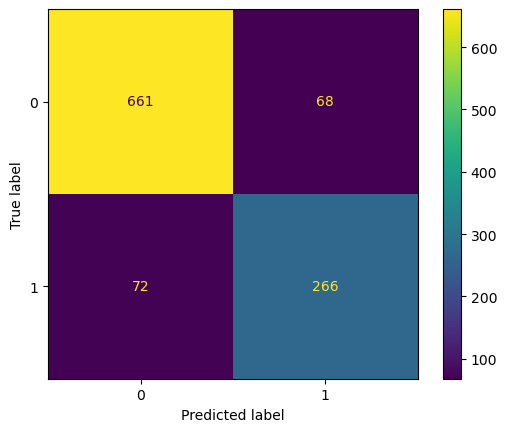

In [41]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, training_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

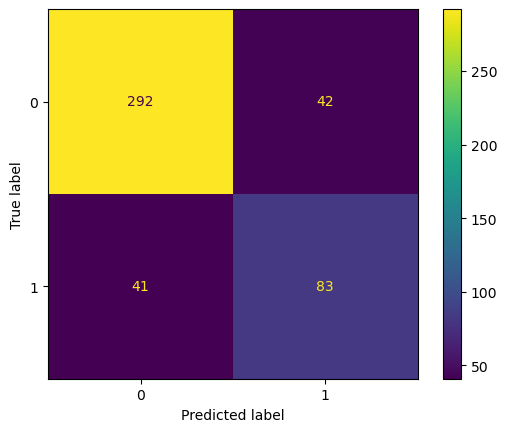

In [42]:
## Confusion matrix on the testing data
cm = confusion_matrix(y_test, testing_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [43]:
# Training Data Probability Prediction
pred_prob_train = knn.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = knn.predict_proba(X_test)

AUC for the Training Data: 0.939
AUC for the Test Data: 0.831


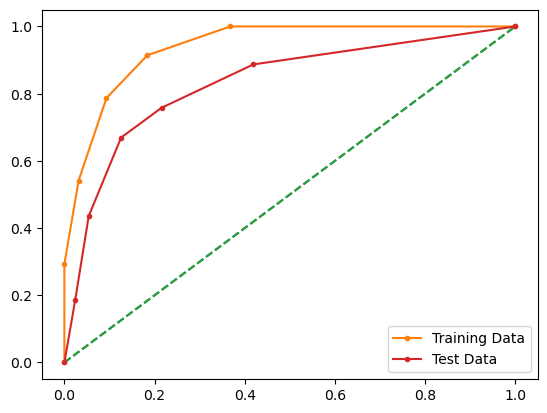

In [44]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Cross Validation

In [45]:
# Perform 5-fold cross-validation
scores = cross_val_score(knn, X, y, cv=5) 

In [46]:
# Print average accuracy
print("Average Accuracy:", scores.mean())

Average Accuracy: 0.8137704918032785


# Naive Bayes

In [47]:
X = df.drop('vote', axis=1)
y = df['vote']

In [48]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [49]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB()


In [50]:
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)

In [51]:
print(metrics.classification_report(y_train, predicted_train))
print(metrics.confusion_matrix(y_train, predicted_train))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       729
           1       0.75      0.74      0.75       338

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067

[[648  81]
 [ 89 249]]


In [52]:
print(metrics.classification_report(y_test, predicted_test))
print(metrics.confusion_matrix(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       334
           1       0.66      0.67      0.67       124

    accuracy                           0.82       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458

[[292  42]
 [ 41  83]]


In [53]:
# prediction on training
training_labels = model.predict(X_train)
training_accuracy = accuracy_score(y_train, training_labels)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8406747891283973


In [54]:
# Testing score

testing_labels = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, testing_labels)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.8187772925764192


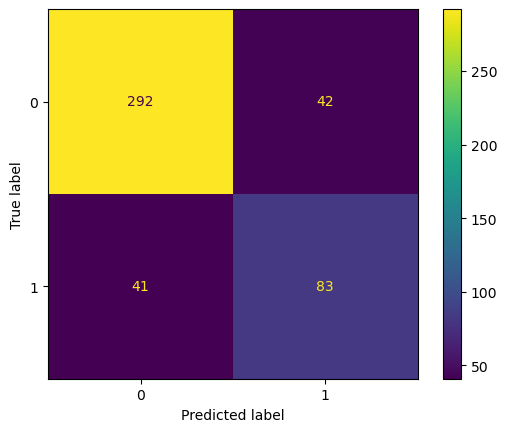

In [55]:
## Confusion matrix on the training data
cm = confusion_matrix(y_test, testing_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [56]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.894
AUC for the Test Data: 0.866


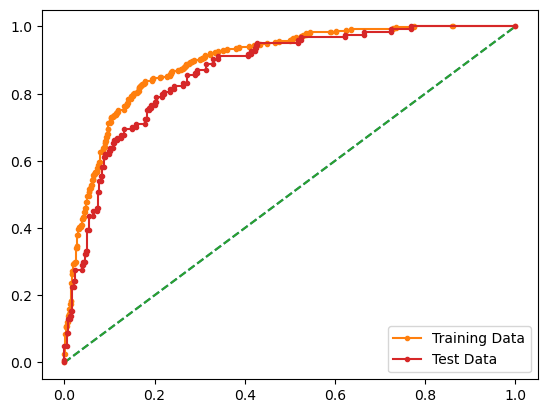

In [57]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [58]:
train_scores = cross_val_score(model, X_train, y_train, cv=5)
train_scores

array([0.85514019, 0.82242991, 0.83568075, 0.84976526, 0.81690141])

In [59]:
test_scores = cross_val_score(model, X_test, y_test, cv=5)
test_scores

array([0.83695652, 0.7826087 , 0.7173913 , 0.83516484, 0.84615385])

In [60]:
print(train_scores.mean())
print(test_scores.mean())

0.835983502259664
0.8036550406115623


### Descision trees

In [61]:
X= df.drop(['vote'], axis=1)
y= df['vote']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [63]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [64]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.759825327510917


### Model Overfitting, Hence prune the tree

In [65]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTreeR.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [66]:
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8416119962511716
0.8253275109170306


In [67]:
training_labels = dTreeR.predict(X_train)
testing_labels=dTreeR.predict(X_test)

In [68]:
print(metrics.classification_report(y_train, training_labels))
print(metrics.confusion_matrix(y_train, training_labels))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       729
           1       0.76      0.73      0.75       338

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.82      1067
weighted avg       0.84      0.84      0.84      1067

[[651  78]
 [ 91 247]]


In [69]:
print(metrics.classification_report(y_test, testing_labels))
print(metrics.confusion_matrix(y_test, testing_labels))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       334
           1       0.67      0.69      0.68       124

    accuracy                           0.83       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.83      0.83      0.83       458

[[293  41]
 [ 39  85]]


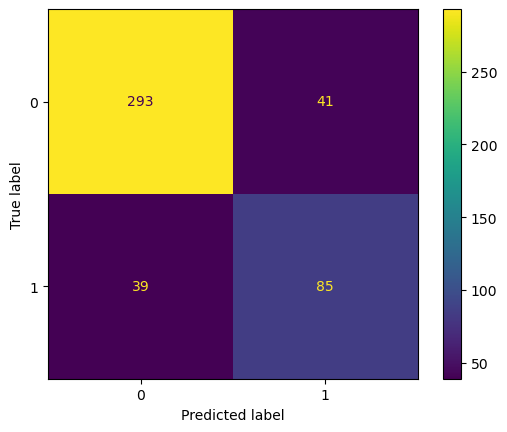

In [70]:
y_predict = dTreeR.predict(X_test)

## Confusion matrix on the training data
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [71]:
# Training Data Probability Prediction
pred_prob_train = dTreeR.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = dTreeR.predict_proba(X_test)

AUC for the Training Data: 0.895
AUC for the Test Data: 0.846


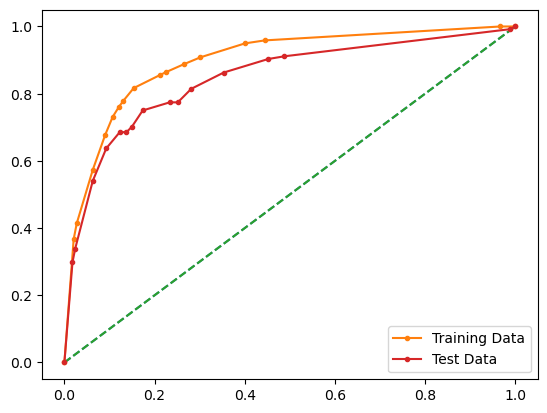

In [72]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Ensemble Methods

## Bagging

In [73]:
bgg = BaggingClassifier(base_estimator=dTree,random_state=7)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [75]:
bgg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  random_state=7)

In [76]:
y_predict_train = bgg.predict(X_train)
y_predict_test = bgg.predict(X_test)

In [77]:
print(metrics.classification_report(y_train, y_predict_train))
print(metrics.confusion_matrix(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       729
           1       1.00      0.94      0.97       338

    accuracy                           0.98      1067
   macro avg       0.99      0.97      0.98      1067
weighted avg       0.98      0.98      0.98      1067

[[728   1]
 [ 19 319]]


In [78]:
print(metrics.classification_report(y_test, y_predict_test))
print(metrics.confusion_matrix(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       334
           1       0.67      0.57      0.62       124

    accuracy                           0.81       458
   macro avg       0.76      0.73      0.74       458
weighted avg       0.80      0.81      0.80       458

[[299  35]
 [ 53  71]]


<Axes: >

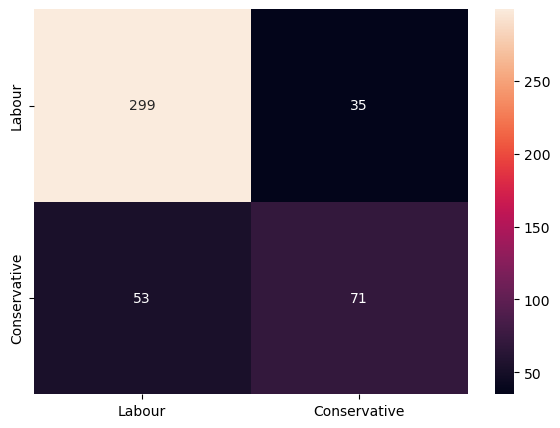

In [79]:
cm=metrics.confusion_matrix(y_test, y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Labour","Conservative"]],
                  columns = [i for i in ["Labour","Conservative"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [80]:
print(bgg.score(X_train, y_train))
print(bgg.score(X_test , y_test))

0.9812558575445174
0.8078602620087336


In [81]:
# Training Data Probability Prediction
pred_prob_train = bgg.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = bgg.predict_proba(X_test)

AUC for the Training Data: 0.999
AUC for the Test Data: 0.836


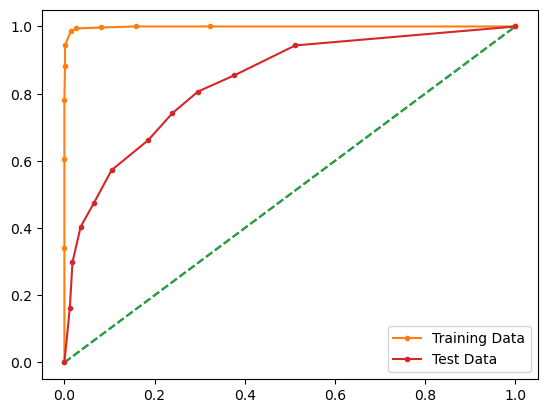

In [82]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

The model has done slightly better than the descision tree (without pruning) but the concept of overfitting has not been reduced yet. The concept of Random Forest in bagging could be an optimal solution

## Random Forest

In [83]:
X= df.drop(['vote'], axis=1)
y= df['vote']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [84]:
rf = RandomForestClassifier()

In [85]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2']
}

In [86]:
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [87]:
# Fit the grid search to the data
# grid_search.fit(X_train, y_train)

In [88]:
# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

In [89]:
best_params = {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

In [90]:
rf = RandomForestClassifier(**best_params)

In [91]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=2)

In [92]:
y_predict = rf.predict(X_test)
y_predict_train = rf.predict(X_train)

In [93]:
print(metrics.classification_report(y_train, y_predict_train))
print(metrics.confusion_matrix(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       729
           1       0.90      0.87      0.88       338

    accuracy                           0.93      1067
   macro avg       0.92      0.91      0.91      1067
weighted avg       0.93      0.93      0.93      1067

[[695  34]
 [ 44 294]]


In [94]:
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       334
           1       0.73      0.65      0.69       124

    accuracy                           0.84       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.84      0.84      0.84       458

[[304  30]
 [ 43  81]]


<Axes: >

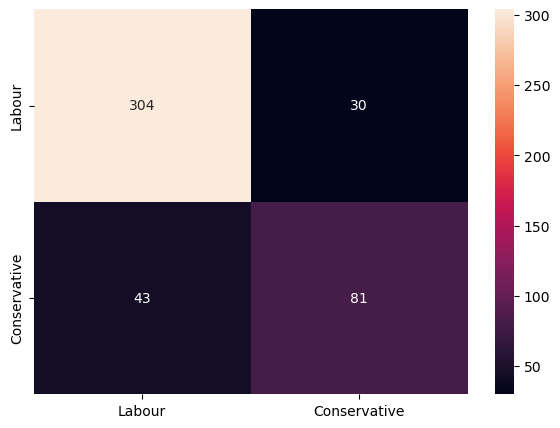

In [95]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Labour","Conservative"]],
                  columns = [i for i in ["Labour","Conservative"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [96]:
print(rf.score(X_train, y_train))
print(rf.score(X_test , y_test))

0.9268978444236177
0.8406113537117904


In [97]:
# Training Data Probability Prediction
pred_prob_train = rf.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = rf.predict_proba(X_test)

AUC for the Training Data: 0.981
AUC for the Test Data: 0.881


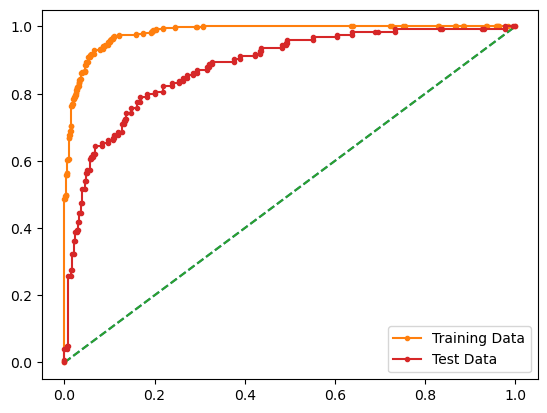

In [98]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Boosting

### Ada-Boost

In [99]:
X= df.drop(['vote'], axis=1)
y= df['vote']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [101]:
ab = AdaBoostClassifier(random_state=1)

In [102]:
ab.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [103]:
y_predict = ab.predict(X_test)
y_predict_train = ab.predict(X_train)

In [104]:
print(metrics.classification_report(y_train, y_predict_train))
print(metrics.confusion_matrix(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       729
           1       0.78      0.73      0.75       338

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.82      1067
weighted avg       0.85      0.85      0.85      1067

[[657  72]
 [ 90 248]]


In [105]:
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       334
           1       0.71      0.65      0.68       124

    accuracy                           0.83       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.83      0.83      0.83       458

[[302  32]
 [ 44  80]]


<Axes: >

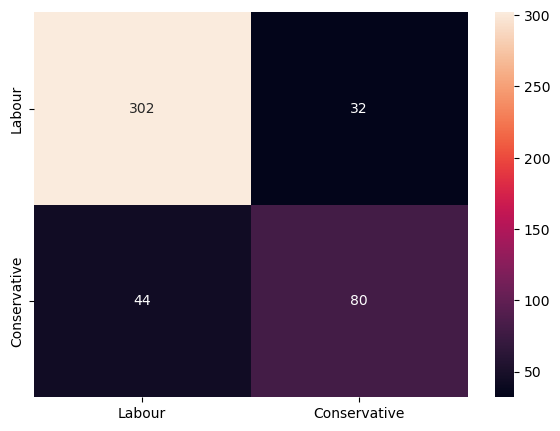

In [106]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Labour","Conservative"]],
                  columns = [i for i in ["Labour","Conservative"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [107]:
print(ab.score(X_train, y_train))
print(ab.score(X_test , y_test))

0.8481724461105904
0.834061135371179


In [108]:
# Training Data Probability Prediction
pred_prob_train = ab.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ab.predict_proba(X_test)

AUC for the Training Data: 0.917
AUC for the Test Data: 0.855


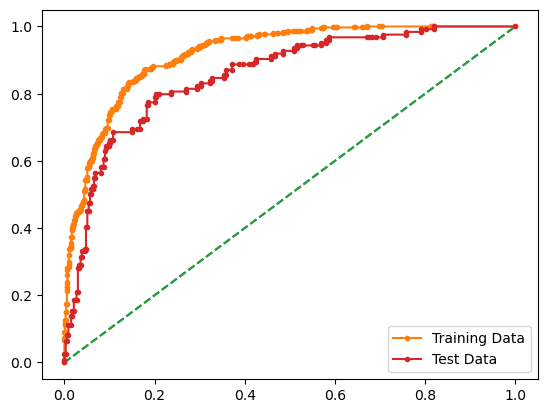

In [109]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [110]:
# Create AdaBoost classifier
# base_estimator = DecisionTreeClassifier(max_depth=1)
# adaboost = AdaBoostClassifier(base_estimator=base_estimator)
# # Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.1, 0.5, 1.0]
# }

# Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [111]:
# Fit the grid search to the data
# grid_search.fit(X_train, y_train)

In [112]:
# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

In [113]:
# best_params = {'learning_rate': 0.5, 'n_estimators': 200}

In [114]:
# Create AdaBoost classifier with best parameters
# best_adaboost = AdaBoostClassifier(**best_params, random_state=7)

# Fit the model on your training data
# best_adaboost.fit(X_train, y_train)

# Make predictions on the test set
# y_predict = best_adaboost.predict(X_test)
# y_predict_train = best_adaboost.predict(X_train)

In [115]:
# print(metrics.classification_report(y_train, y_predict_train))
# print(metrics.confusion_matrix(y_train, y_predict_train))

In [116]:
# print(metrics.classification_report(y_test, y_predict))
# print(metrics.confusion_matrix(y_test, y_predict))

In [117]:
# cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

# df_cm = pd.DataFrame(cm, index = [i for i in ["Labour","Conservative"]],
#                   columns = [i for i in ["Labour","Conservative"]])
# plt.figure(figsize = (7,5))
# sns.heatmap(df_cm, annot=True ,fmt='g')

In [118]:
# print(best_adaboost.score(X_train, y_train))
# print(best_adaboost.score(X_test , y_test))

In [119]:
# Training Data Probability Prediction
# pred_prob_train = best_adaboost.predict_proba(X_train)

# # Test Data Probability Prediction
# pred_prob_test = best_adaboost.predict_proba(X_test)

## Gradient Boosting

In [120]:
X= df.drop(['vote'], axis=1)
y= df['vote']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [122]:
gb = GradientBoostingClassifier()

In [123]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [124]:
y_predict = gb.predict(X_test)
y_predict_train = gb.predict(X_train)

In [125]:
print(metrics.classification_report(y_train, y_predict_train))
print(metrics.confusion_matrix(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       729
           1       0.84      0.80      0.82       338

    accuracy                           0.89      1067
   macro avg       0.88      0.87      0.87      1067
weighted avg       0.89      0.89      0.89      1067

[[677  52]
 [ 66 272]]


In [126]:
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       334
           1       0.70      0.65      0.68       124

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.83      0.83      0.83       458

[[300  34]
 [ 43  81]]


<Axes: >

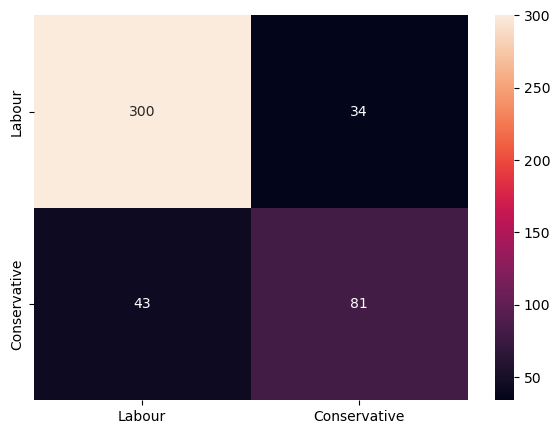

In [127]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Labour","Conservative"]],
                  columns = [i for i in ["Labour","Conservative"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [128]:
print(gb.score(X_train, y_train))
print(gb.score(X_test , y_test))

0.8894095595126523
0.8318777292576419


In [129]:
# Training Data Probability Prediction
pred_prob_train = gb.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gb.predict_proba(X_test)

AUC for the Training Data: 0.952
AUC for the Test Data: 0.880


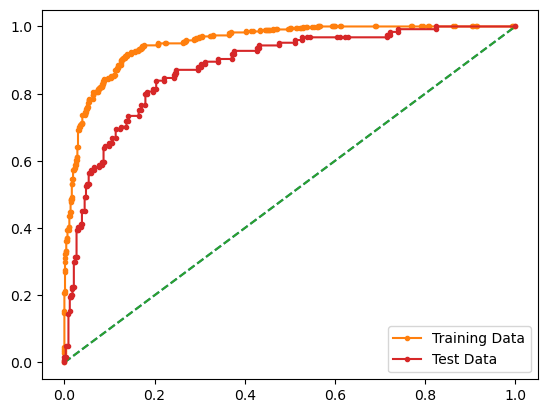

In [130]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [131]:
# param_grid = {
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 3],
#     'max_features': ['sqrt', 'log2']
# }

param_dist = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

In [132]:
gb = GradientBoostingClassifier()

In [133]:
# random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=2)

In [134]:
# random_search.fit(X_train, y_train)

In [135]:
# Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

In [136]:
best_params =  {'learning_rate': 0.048867728968948206, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 14, 'n_estimators': 140}

In [137]:
# Create AdaBoost classifier with best parameters
best_gb = GradientBoostingClassifier(**best_params, random_state=7)

# Fit the model on your training data
best_gb.fit(X_train, y_train)

# Make predictions on the test set
y_predict = best_gb.predict(X_test)
y_predict_train = best_gb.predict(X_train)

In [138]:
best_gb

GradientBoostingClassifier(learning_rate=0.048867728968948206, max_depth=4,
                           max_features='sqrt', min_samples_leaf=5,
                           min_samples_split=14, n_estimators=140,
                           random_state=7)

In [139]:
print(metrics.classification_report(y_train, y_predict_train))
print(metrics.confusion_matrix(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       729
           1       0.85      0.81      0.83       338

    accuracy                           0.90      1067
   macro avg       0.88      0.87      0.88      1067
weighted avg       0.89      0.90      0.89      1067

[[680  49]
 [ 63 275]]


In [140]:
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       334
           1       0.72      0.65      0.69       124

    accuracy                           0.84       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.84      0.84       458

[[303  31]
 [ 43  81]]


<Axes: >

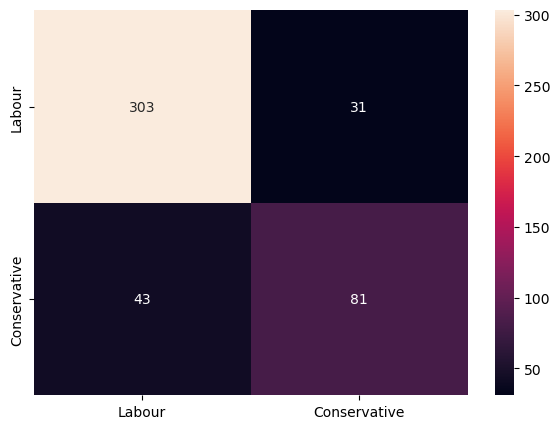

In [141]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Labour","Conservative"]],
                  columns = [i for i in ["Labour","Conservative"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [142]:
print(best_gb.score(X_train, y_train))
print(best_gb.score(X_test , y_test))

0.895032802249297
0.8384279475982532


In [143]:
# Training Data Probability Prediction
pred_prob_train = best_gb.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_gb.predict_proba(X_test)

AUC for the Training Data: 0.953
AUC for the Test Data: 0.881


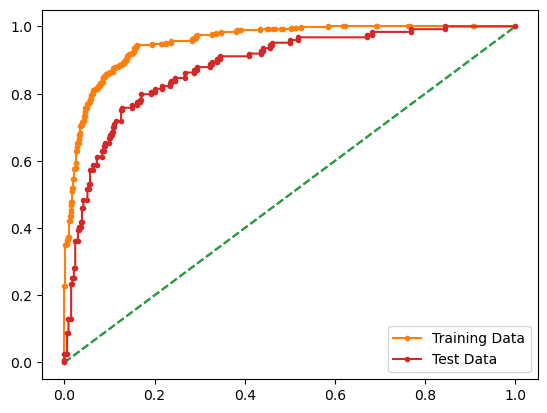

In [144]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## XGBoost

In [145]:
X = df.drop(['vote'], axis=1)
y = df['vote']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [147]:
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [148]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [149]:
y_predict = xgb.predict(X_test)
y_predict_train = xgb.predict(X_train)

In [150]:
print(metrics.classification_report(y_train, y_predict_train))
print(metrics.confusion_matrix(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       729
           1       0.99      0.99      0.99       338

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067

[[727   2]
 [  2 336]]


In [151]:
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       334
           1       0.64      0.65      0.65       124

    accuracy                           0.81       458
   macro avg       0.75      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458

[[288  46]
 [ 43  81]]


<Axes: >

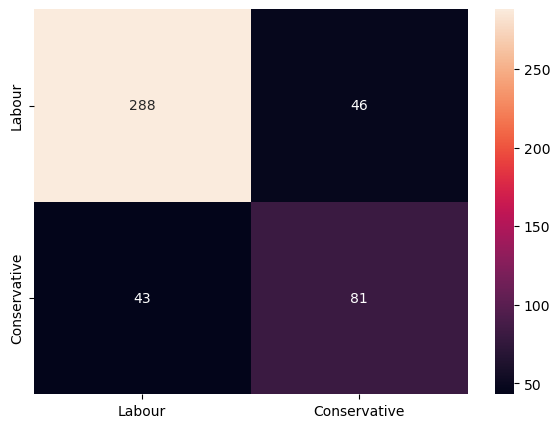

In [152]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Labour","Conservative"]],
                  columns = [i for i in ["Labour","Conservative"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [153]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test , y_test))

0.9962511715089035
0.8056768558951966


In [154]:
# Training Data Probability Prediction
pred_prob_train = xgb.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = xgb.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.845


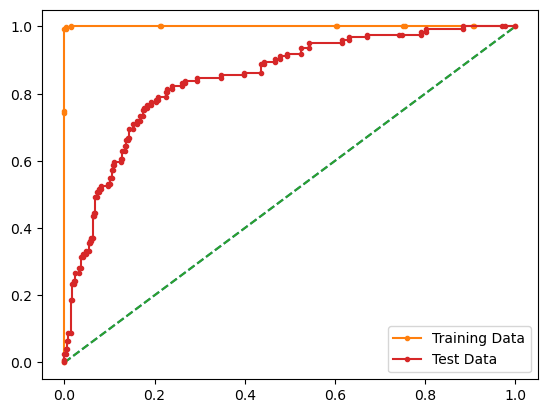

In [155]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [156]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

In [157]:
# grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=parameters, cv=5, scoring='accuracy', verbose=2)

In [158]:
# Fit the grid search to the data
# grid_search.fit(X_train, y_train)

In [159]:
# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

In [160]:
best_params = {'colsample_bylevel': 0.5, 'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.1, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.5}

In [161]:
# Create AdaBoost classifier with best parameters
best_xgb = XGBClassifier(**best_params, random_state=7)

# Fit the model on your training data
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_predict = best_xgb.predict(X_test)
y_predict_train = best_xgb.predict(X_train)

In [162]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

In [163]:
print(metrics.classification_report(y_train, y_predict_train))
print(metrics.confusion_matrix(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       729
           1       0.82      0.75      0.78       338

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.87      1067

[[673  56]
 [ 86 252]]


In [164]:
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       334
           1       0.72      0.66      0.69       124

    accuracy                           0.84       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.84      0.84       458

[[302  32]
 [ 42  82]]


<Axes: >

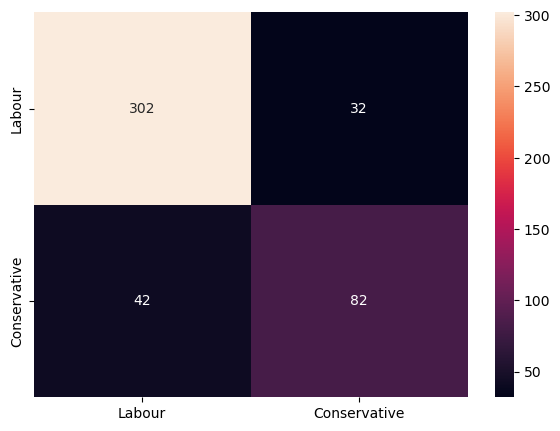

In [165]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Labour","Conservative"]],
                  columns = [i for i in ["Labour","Conservative"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [166]:
print(best_xgb.score(X_train, y_train))
print(best_xgb.score(X_test , y_test))

0.8669165885660731
0.8384279475982532


In [167]:
# Training Data Probability Prediction
pred_prob_train = best_xgb.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_xgb.predict_proba(X_test)

AUC for the Training Data: 0.930
AUC for the Test Data: 0.884


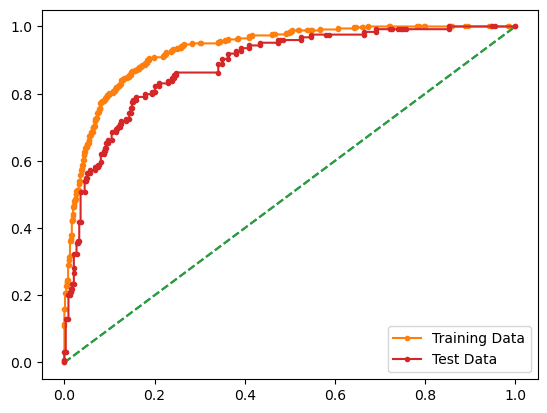

In [168]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [169]:
feature_importances = best_xgb.feature_importances_
feature_names = X.columns

In [170]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [171]:
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

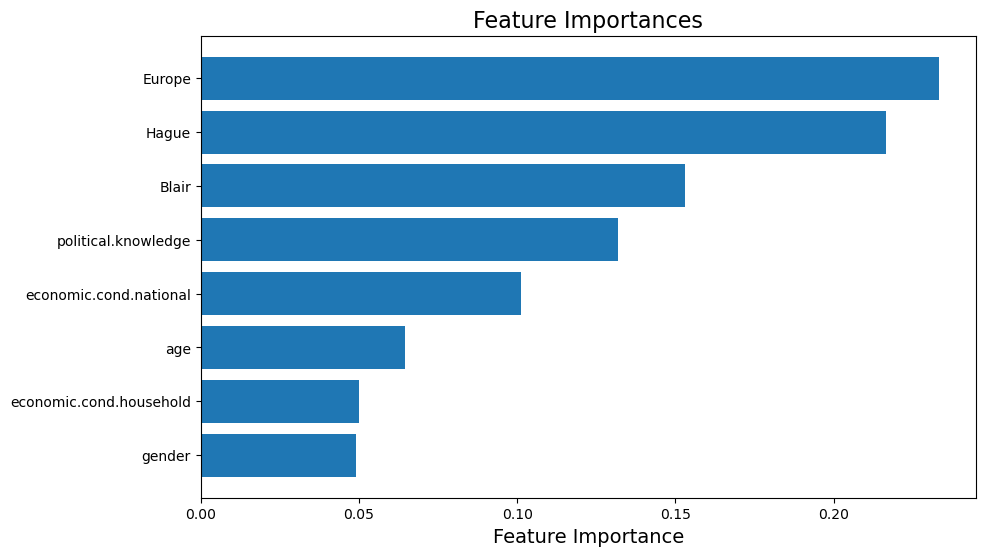

In [172]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_features['Importance'], align='center')
plt.yticks(range(len(sorted_features)), sorted_features['Feature'])
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

# Problem 2
## Speeches of the Presidents of the United States of America:

### President Franklin D. Roosevelt in 1941
### President John F. Kennedy in 1961
### President Richard Nixon in 1973

In [173]:
import nltk
nltk.download('inaugural')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import inaugural
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [174]:
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')

## Number of characters, words and sentences identified in the corpus 

In [175]:
# Function to count characters, words, and sentences
def count_stats(text):
    num_chars = len(text)
    words = word_tokenize(text)
    num_words = len(words)
    sentences = sent_tokenize(text)
    num_sentences = len(sentences)
    return num_chars, num_words, num_sentences

In [176]:
roosevelt_chars, roosevelt_words, roosevelt_sentences = count_stats(roosevelt_speech)
kennedy_chars, kennedy_words, kennedy_sentences = count_stats(kennedy_speech)
nixon_chars, nixon_words, nixon_sentences = count_stats(nixon_speech)

In [177]:
print("Roosevelt Speech:")
print("Number of Characters:", roosevelt_chars)
print("Number of Words:", roosevelt_words)
print("Number of Sentences:", roosevelt_sentences)
print()

print("Kennedy Speech:")
print("Number of Characters:", kennedy_chars)
print("Number of Words:", kennedy_words)
print("Number of Sentences:", kennedy_sentences)
print()

print("Nixon Speech:")
print("Number of Characters:", nixon_chars)
print("Number of Words:", nixon_words)
print("Number of Sentences:", nixon_sentences)

Roosevelt Speech:
Number of Characters: 7571
Number of Words: 1526
Number of Sentences: 68

Kennedy Speech:
Number of Characters: 7618
Number of Words: 1543
Number of Sentences: 52

Nixon Speech:
Number of Characters: 9991
Number of Words: 2006
Number of Sentences: 68


## Text cleaning

In [178]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
def preprocess(text):
    words = word_tokenize(text)
    filtered_words = [stemmer.stem(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]
    return filtered_words

In [180]:
# Preprocess speeches
roosevelt_words = preprocess(roosevelt_speech)
kennedy_words = preprocess(kennedy_speech)
nixon_words = preprocess(nixon_speech)

In [181]:
# Count word frequencies
roosevelt_freq = Counter(roosevelt_words)
kennedy_freq = Counter(kennedy_words)
nixon_freq = Counter(nixon_words)

In [182]:
print("The 3 most comman words in Roosevelt speech are",roosevelt_freq.most_common(3))
print("The 3 most comman words in Kennedy speech are",kennedy_freq.most_common(3))
print("The 3 most comman words in Nixon speech are",nixon_freq.most_common(3))

The 3 most comman words in Roosevelt speech are [('nation', 17), ('know', 10), ('peopl', 9)]
The 3 most comman words in Kennedy speech are [('let', 16), ('us', 12), ('power', 9)]
The 3 most comman words in Nixon speech are [('us', 26), ('let', 22), ('america', 21)]


In [183]:
# Combine all word frequencies
combined_freq = roosevelt_freq + kennedy_freq + nixon_freq

# Get the three most common words
common_words = combined_freq.most_common(3)

print("Three most common words in all three speeches after preprocessing:")
for word, freq in common_words:
    print(f"{word}: {freq} times")

Three most common words in all three speeches after preprocessing:
us: 46 times
nation: 40 times
let: 39 times


## Word cloud

In [184]:
# Create word clouds for individual speeches
def create_word_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(' '.join(text))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show() 

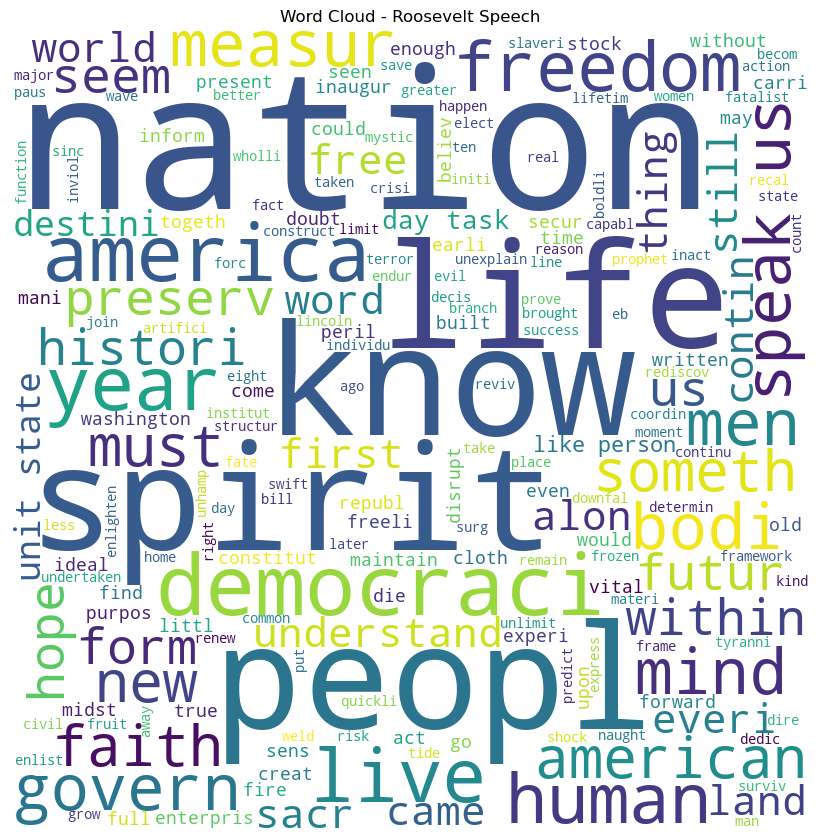

In [185]:
create_word_cloud(roosevelt_words, "Word Cloud - Roosevelt Speech")

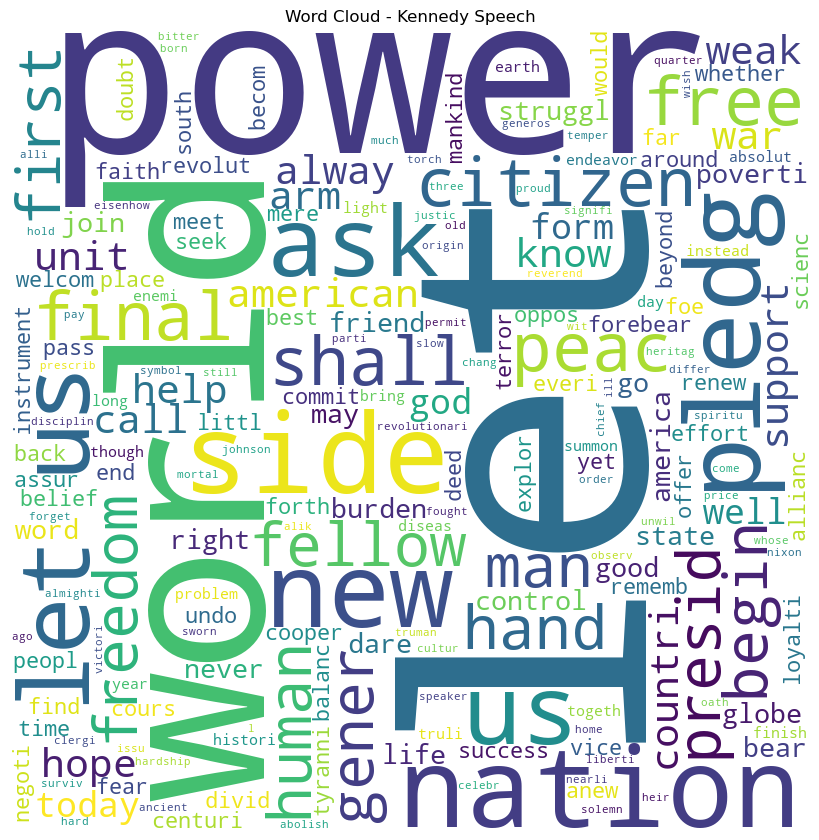

In [186]:
create_word_cloud(kennedy_words, "Word Cloud - Kennedy Speech")

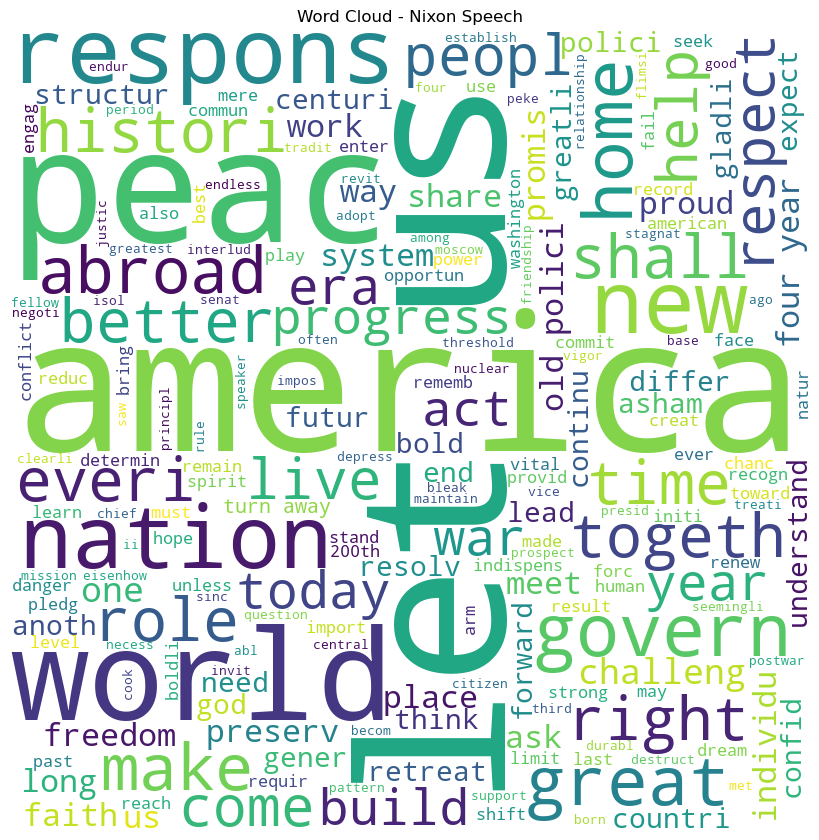

In [187]:
create_word_cloud(nixon_words, "Word Cloud - Nixon Speech")

In [188]:
all_words = roosevelt_words + kennedy_words + nixon_words
all_freq = Counter(all_words)
common_words_all = all_freq.most_common(20)  # Adjust the number of common words as per need

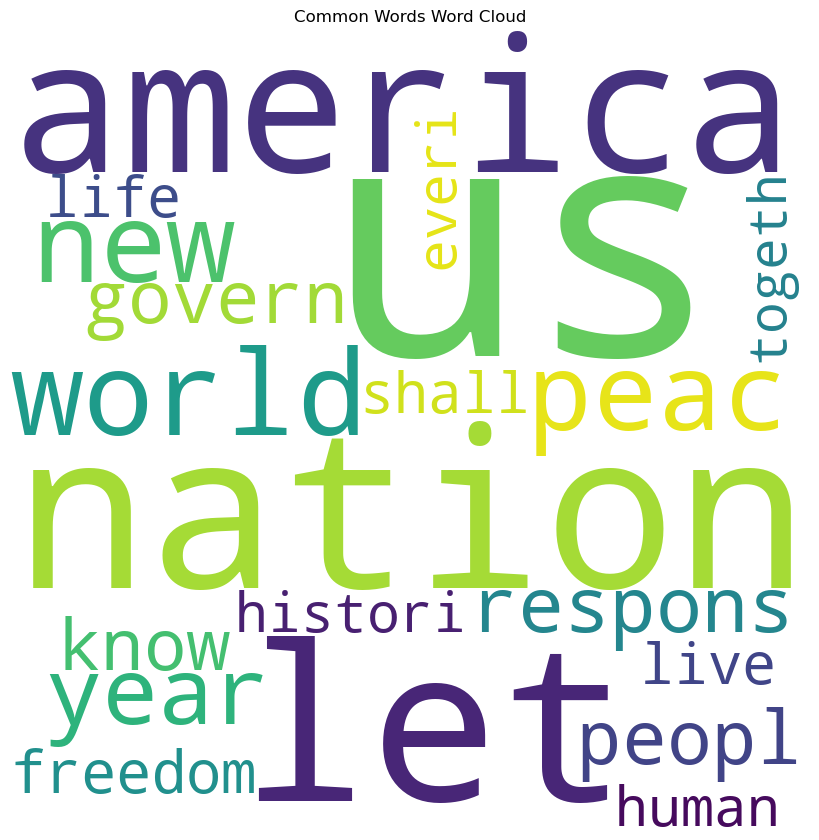

In [189]:
# Create word cloud for common words across all speeches
common_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate_from_frequencies(dict(common_words_all))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(common_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Common Words Word Cloud")
plt.show() 